GLOBAL IMPACT - 2TDSG

Ponto e Virgula

RM86358 - Bianca Nunes Ferraz Cabral

RM86364 - Lennyk Macedo dos Santos

RM86378 - Lucas Ferreira Gonçalves

RM86350 - Micaela Mota Santos

RM84530 - Nalita Tsu Kao

Para a Global Impact, foi solicitado um sistema de aprendizado em máquina que fosse capaz de reconhecer quais linhagem de tomateiro são mais resistente ao fungo Phytophthora Infestans, através do dataset apresentado. Dessa maneira primeiro realizado estudo sas metricas apresentadas, em seguida o treinamento e teste dos dados disponiveis com o resultado apresentado abaixo.

In [74]:
#Primeiramente vamos importar as bibliotecas necessarias para graficos e comandos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


A partir daqui é importado as informações e realizado a classificação do mesmo, identificado como header.

In [75]:
#Importa o dataset com as informações do projeto.
url = "dataset_tomate-main\dataset_tomate.csv"

# Define o nome das colunas
header = ['id','trat','NDVI_d28','SAVI_d28','GNDVI_d28','MCARI1_d28','SR_d28','NDVI_d01','SAVI_d01','GNDVI_d01','MCARI1_d01','SR_d01','NDVI_d04','SAVI_d04','GNDVI_d04','MCARI1_d04','SR_d04','NDVI_d08','SAVI_d08','GNDVI_d08','MCARI1_d08','SR_d08','Classe']

# Lê e carrega o arquivo para a memória
df = pd.read_csv(url, header=None, names=header)


No dataset existem 4 quadrantes identificados por d28, d01, d04, d08, e cada quadrante foram plantadas 2 tipos de tomateiros separados por Classe 0 e 1, também dentro dos quadrantes foram utilizados sensores capaz de coletar dados agriculas que são eles NDVI, SAVI, GNDVI, MCARI1, SR  estudado o significado de cada metrica. 

De acordo com os nossos estudos a umidade é o fator determinante para a ocorrência de doenças em plantas, principalmente as doenças foliares. A temperatura age como um catalisador, ou seja, acelera ou retarda o ciclo do patógeno.

Nesse contexto, foram criados determinados índices para a análise da vegetação, que são combinações aritméticas de duas ou mais bandas relacionadas com características espectrais da vegetação. Índices de vegetação, como o NDVI (Normalized Difference Vegetation Índex) e o SAVI (Soil Adjusted Vegetation Index), são amplamente utilizados para o monitoramento fenológico e classificação da vegetação, e também para o estudo dos parâmetros estruturais da vegetação essas metricas serão utilizados para determinar a resistência dos tomateiros CLASSE 0 e 1.

Na maioria dos casos, valores do NDVI entre 0,2 e 0,4 correspondem a áreas com vegetação escassa; vegetação moderada tende a variar entre 0,4 e 0,6; qualquer coisa acima de 0,6 indica a maior densidade possível de folhas verdes.
SAVI valor varia entre -1 e 1, dependendo da quantidade de vegetação verde presente na área. Para fazer uma análise de sensoriamento remoto das áreas com alta vegetação verde.

Essas são as metricas utilizadas nesse projeto.

Classe
0    41
1    91
dtype: int64
Formato das tabelas de dados (132, 2) e classes (132,)
Formato das tabelas de dados de treino (105, 2) e teste (27, 2)
Predição: [1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1]
Acerto médio de classificação:  0.9629629629629629


C:\Users\Usuario\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


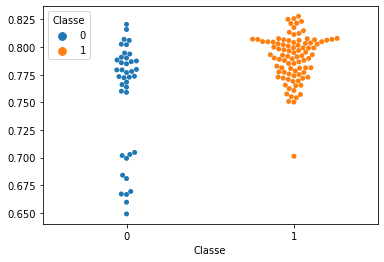

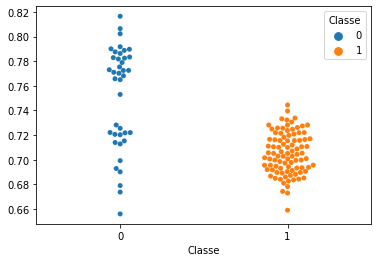

Comparação do pior e melhor quadrante com %80 de precisão para qual classe melhor se comporta:


C:\Users\Usuario\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


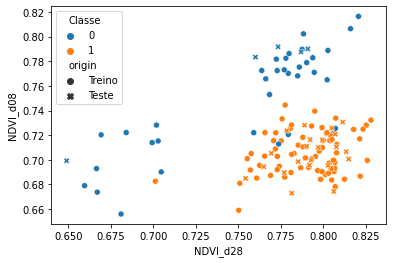

In [76]:
# class distribution
print(df.groupby('Classe').size())


#Definindo variaveis

#Dentro da metrica NDVI, quadrante d28 e d01 foram apresentados respectivamente o melhor e pior desempenho nessa metrica.
X = df[['NDVI_d28','NDVI_d08']]
Y = df['Classe']
print(f"Formato das tabelas de dados {X.shape} e classes {Y.shape}")

#defindo informações para treino e teste do ML
entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(X, Y, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")


entradas_treino.head()
classes_treino.head()


# Cria o classificar KNN
k = 9
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)

classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))

acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

# Criamos um modelo utilizando duas entradas e uma saida, logo temos que passar duas entradas para o modelo faça a predição. 
modelo.predict([[2.3, 9.2]])

# Unificamos os dados de entrada e as classes de treino e teste em um daframe cada
df_treino = pd.concat((entradas_treino, classes_treino), axis=1)

novas_classes = pd.Series(classes_encontradas, name="Classe", index=entradas_teste.index)
df_teste = pd.concat((entradas_teste, novas_classes), axis=1)

## Unificamos os dataframes de treinamento e teste em um novo DataFrame
# indicando a origem dos dados
novo_df = pd.concat((df_treino, df_teste), keys=['train', 'test'])
novo_df['origin'] = ''
novo_df.loc['train','origin'] = 'Treino'
novo_df.loc['test','origin'] = 'Teste'

#Gerando os graficos com as informações geradas
ax = sns.swarmplot(data=novo_df, x='Classe', y='NDVI_d28', hue="Classe")
ax.set(ylabel="")
plt.show()

#Gerando os graficos com as informações geradas
ax = sns.swarmplot(data=novo_df, x='Classe', y='NDVI_d08', hue="Classe")
ax.set(ylabel="")
plt.show()

print("Comparação do pior e melhor quadrante com %80 de precisão para qual classe melhor se comporta:")

# Usamos o scatterplot do seaborn, informando mudando o marcador de acordo com a origem do dado
sns.scatterplot('NDVI_d28', 'NDVI_d08', hue='Classe', style='origin', data=novo_df)
plt.show()



Abaixo a taxa de acerto do nosso Machine Learning de Classificação da metrica NDVI:

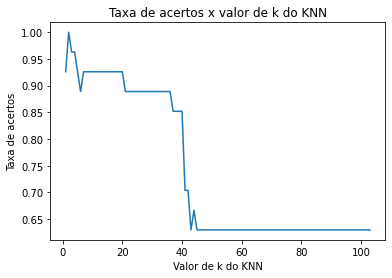

In [83]:
# loop for para diferntes k
k_range = list(range(1,25))
acertos = []
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, classes_treino)
    classes_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(classes_teste, classes_encontradas))
  
  
plt.plot(k_range, acertos)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()


Machine Learning para a segunda metrica de comparação dos quadrantes estudados, SAVI é o índice de vegetação foi desenhado para minimizar as influências da luminosidade do solo

Formato das tabelas de dados (132, 2) e classes (132,)
Formato das tabelas de dados de treino (105, 2) e teste (27, 2)
Predição: [1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0]
Acerto médio de classificação:  0.9259259259259259


C:\Users\Usuario\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


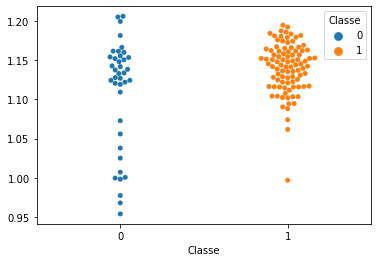

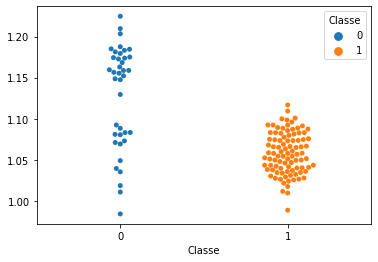

Comparação do pior e melhor quadrante com %80 de precisão para qual classe melhor se comporta:


C:\Users\Usuario\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


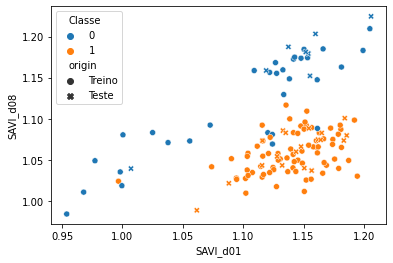

In [78]:
#Definindo variaveis

#Dentro da metrica SAVI, quadrante d01 e d08 foram apresentados respectivamente o melhor e pior desempenho nessa metrica.
X = df[['SAVI_d01','SAVI_d08']]
Y = df['Classe']
print(f"Formato das tabelas de dados {X.shape} e classes {Y.shape}")

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(X, Y, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

entradas_treino.head()

classes_treino.head()


# Cria o classificar KNN
k = 9
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)

classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))

acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

# Criamos um modelo utilizando duas entradas e uma saida, logo temos que passar duas entradas para o modelo faça a predição. 
modelo.predict([[2.3, 9.2]])

# Unificamos os dados de entrada e as classes de treino e teste em um daframe cada
df_treino = pd.concat((entradas_treino, classes_treino), axis=1)

novas_classes = pd.Series(classes_encontradas, name="Classe", index=entradas_teste.index)
df_teste = pd.concat((entradas_teste, novas_classes), axis=1)

## Unificamos os dataframes de treinamento e teste em um novo DataFrame
# indicando a origem dos dados
novo_df = pd.concat((df_treino, df_teste), keys=['train', 'test'])
novo_df['origin'] = ''
novo_df.loc['train','origin'] = 'Treino'
novo_df.loc['test','origin'] = 'Teste'


#Gerando os graficos com as informações geradas
ax = sns.swarmplot(data=novo_df, x='Classe', y='SAVI_d01', hue="Classe")
ax.set(ylabel="")
plt.show()

#Gerando os graficos com as informações geradas
ax = sns.swarmplot(data=novo_df, x='Classe', y='SAVI_d08', hue="Classe")
ax.set(ylabel="")
plt.show()

print("Comparação do pior e melhor quadrante com %80 de precisão para qual classe melhor se comporta:")

# Usamos o scatterplot do seaborn, informando mudando o marcador de acordo com a origem do dado
sns.scatterplot('SAVI_d01', 'SAVI_d08', hue='Classe', style='origin', data=novo_df)
plt.show()

Abaixo a taxa de acerto do nosso Machine Learning de Classificação da metrica SAVI:

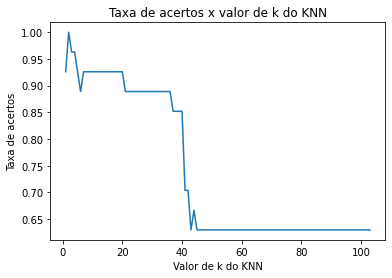

In [82]:
# loop for para diferntes k
k_range = list(range(1,25))
acertos = []
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, classes_treino)
    classes_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(classes_teste, classes_encontradas))
  
  
plt.plot(k_range, acertos)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()


CONCLUSÃO:

Após ser verificado e comparado pelo nosso ML, foi constatado de acordo com a informações coletadas que a classe mais resistente ao fungo é a classe 1 de tomateiros nosso, IA consegue identificar o mesmo dentro desse dataset com mais de 80% de precisão.